In [1]:
'''
The Heart.csv file presents the clinical data of patients along with the
record of the existence or not of heart disease (column AHD). Using an SVM,
the task is to predict whether a patient has heart disease or not from the
clinical data (binary classification). To do this, follow these steps:

Split the data into training and testing (70-30) keeping both sets approximately
balanced. Discard entries with missing information (NA).

Select 2 features from the 13 available.

Plot the training and testing sets using the chosen variables.

Use the training set to fit an SVM with linear, polynomial, and radial kernels.

Adjust the hyperparameters accordingly.

Plot the maximum margin [2] of the training set for each kernel.

Plot the regions and decision boundaries [3] of the training set for each kernel.

Estimate the heart disease (AHD) on the test set and calculate the accuracy
(percentage of success) for each kernel.

Present the plots of the regions and decision boundaries of the test set for
each kernel.

OPTIONAL: Define a new SVM model using all the features, repeat the estimation
on the test set, and check if the accuracy has improved.
'''

'\nThe Heart.csv file presents the clinical data of patients along with the\nrecord of the existence or not of heart disease (column AHD). Using an SVM,\nthe task is to predict whether a patient has heart disease or not from the\nclinical data (binary classification). To do this, follow these steps:\n\nSplit the data into training and testing (70-30) keeping both sets approximately\nbalanced. Discard entries with missing information (NA).\n\nSelect 2 features from the 13 available.\n\nPlot the training and testing sets using the chosen variables.\n\nUse the training set to fit an SVM with linear, polynomial, and radial kernels.\n\nAdjust the hyperparameters accordingly.\n\nPlot the maximum margin [2] of the training set for each kernel.\n\nPlot the regions and decision boundaries [3] of the training set for each kernel.\n\nEstimate the heart disease (AHD) on the test set and calculate the accuracy\n(percentage of success) for each kernel.\n\nPresent the plots of the regions and decisio

In [2]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Heart.csv")
data.head()

# about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


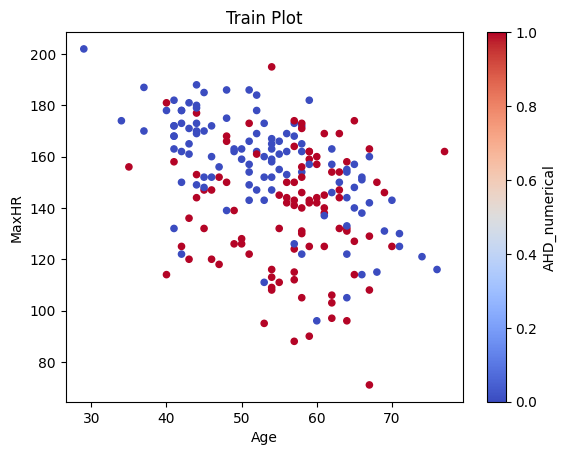

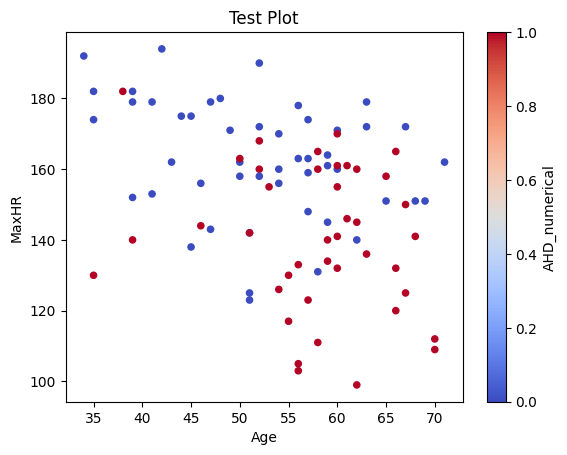

In [4]:
# Split the data into training and testing (70-30) keeping both sets
# approximately balanced. Discard entries with missing information (NA).

data = data.dropna()
data.head()

# split training 70% and testing 30%
train, test = train_test_split(data, test_size=0.3, random_state=42)

# Select 2 features from the 13 available
# Select Age and maxHR
X_train = train[["Age", "MaxHR"]]
y_train = train["AHD"]

X_test = test[["Age", "MaxHR"]]
y_test = test["AHD"]

# Convert 'AHD' to numerical values for plotting
train['AHD_numerical'] = train['AHD'].apply(lambda x: 1 if x == 'Yes' else 0)
test['AHD_numerical'] = test['AHD'].apply(lambda x: 1 if x == 'Yes' else 0)


# Plot the training and testing sets using the chosen variables
plot_train = train.plot.scatter(x="Age", y="MaxHR", c="AHD_numerical", cmap="coolwarm")
plot_train.set_title("Train Plot")
plot_train.figure.savefig("plot_train.png")

plot_test = test.plot.scatter(x="Age", y="MaxHR", c="AHD_numerical", cmap="coolwarm")
plot_test.set_title("Test Plot")
plot_test.figure.savefig("plot_test.png")

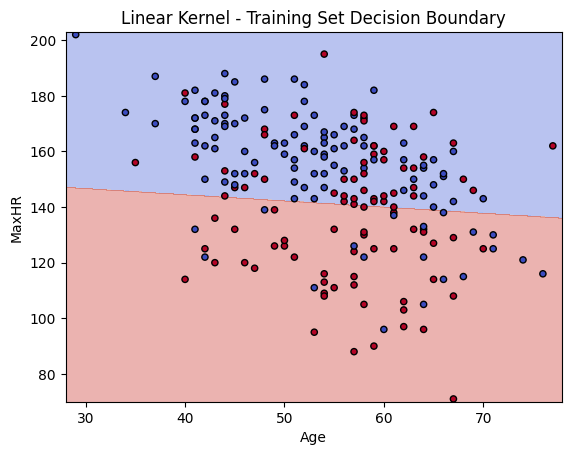

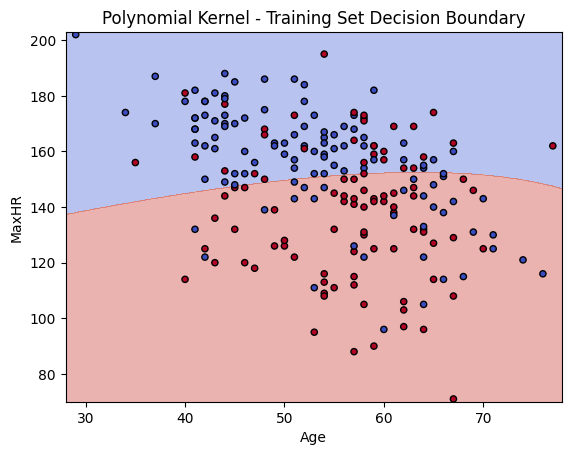

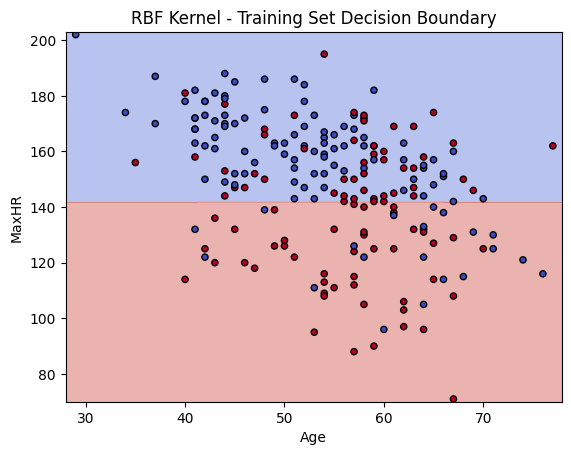

Linear Accuracy: 0.7222222222222222
Polynomial Accuracy: 0.7111111111111111
RBF Accuracy: 0.7333333333333333


In [5]:
import matplotlib.pyplot as plt

# Use the training set to fit an SVM with linear, polynomial, and radial kernels
linear = svm.SVC(kernel="linear")
linear.fit(X_train, y_train)

poly = svm.SVC(kernel="poly", degree=3) # Added degree for polynomial kernel
poly.fit(X_train, y_train)

rbf = svm.SVC(kernel="rbf")
rbf.fit(X_train, y_train)

# Adjust the hyperparameters accordingly (default values are used for now)

# Plot the regions and decision boundaries of the training set for each kernel

def plot_decision_boundary(X, y, model, title):
    # Create a meshgrid of points
    x_min, x_max = X["Age"].min() - 1, X["Age"].max() + 1
    y_min, y_max = X["MaxHR"].min() - 1, X["MaxHR"].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict on the meshgrid
    meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
    meshgrid_df = pd.DataFrame(meshgrid_points, columns=["Age", "MaxHR"]) # Convert to DataFrame
    Z = model.predict(meshgrid_df)
    Z = Z.reshape(xx.shape)

    # Convert predictions to numerical for plotting contours
    Z_numerical = np.array([1 if pred == 'Yes' else 0 for pred in Z.ravel()]).reshape(xx.shape)

    # Convert y to numerical for plotting
    y_numerical = y.apply(lambda x: 1 if x == 'Yes' else 0)

    # Plot the contour lines and the data points
    plt.contourf(xx, yy, Z_numerical, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X["Age"], X["MaxHR"], c=y_numerical, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Age")
    plt.ylabel("MaxHR")
    plt.title(title)


# Plot decision boundaries for each kernel on the training set
plot_decision_boundary(X_train, y_train, linear, "Linear Kernel - Training Set Decision Boundary")
plt.savefig("plot_decision_linear.png")
plt.show()

plot_decision_boundary(X_train, y_train, poly, "Polynomial Kernel - Training Set Decision Boundary")
plt.savefig("plot_decision_poly.png")
plt.show()

plot_decision_boundary(X_train, y_train, rbf, "RBF Kernel - Training Set Decision Boundary")
plt.savefig("plot_decision_rbf.png")
plt.show()

# Estimate the heart disease (AHD) on the test set and calculate the accuracy
# (percentage of success) for each kernel
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

linear_acc = accuracy_score(y_test, linear_pred)
poly_acc = accuracy_score(y_test, poly_pred)
rbf_acc = accuracy_score(y_test, rbf_pred)

print("Linear Accuracy:", linear_acc)
print("Polynomial Accuracy:", poly_acc)
print("RBF Accuracy:", rbf_acc)

# OPTIONAL: Define a new SVM model using all the features, repeat the estimation
# on the test set, and check if the accuracy has improved

In [6]:
# OPTIONAL: Define a new SVM model using all the features, repeat the estimation
# on the test set, and check if the accuracy has improved

'''
Here is a plan to accomplish this:

Prepare data with all features: Select all relevant features from the dataset
and separate them into features (X) and the target variable (y).
Handle categorical features if necessary.

Split data: Split the dataset with all features into training and testing
sets (70-30 split), ensuring the split is stratified to maintain the proportion
of the target variable in both sets.

Train svm model with all features: Train an SVM model using the training
set with all features.

Evaluate model: Predict the heart disease (AHD) on the test set using the
model trained with all features and calculate the accuracy.

Compare accuracies: Compare the accuracy of the model trained with all features
to the accuracies of the models trained with two features
(linear, polynomial, and RBF kernels) that were calculated previously.

Finish task: Summarize the results and provide an explanation of whether
using all features improved the accuracy.
'''



'\nHere is a plan to accomplish this:\n\nPrepare data with all features: Select all relevant features from the dataset\nand separate them into features (X) and the target variable (y).\nHandle categorical features if necessary.\n\nSplit data: Split the dataset with all features into training and testing\nsets (70-30 split), ensuring the split is stratified to maintain the proportion\nof the target variable in both sets.\n\nTrain svm model with all features: Train an SVM model using the training\nset with all features.\n\nEvaluate model: Predict the heart disease (AHD) on the test set using the\nmodel trained with all features and calculate the accuracy.\n\nCompare accuracies: Compare the accuracy of the model trained with all features\nto the accuracies of the models trained with two features\n(linear, polynomial, and RBF kernels) that were calculated previously.\n\nFinish task: Summarize the results and provide an explanation of whether\nusing all features improved the accuracy.\n'

In [7]:
# Create a new DataFrame X by dropping the 'AHD' column and the 'Unnamed: 0' column
X = data.drop(columns=["AHD", "Unnamed: 0"])

# Create a new Series y containing only the 'AHD' column
y = data["AHD"]

# Identify categorical columns in X
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to the identified categorical columns in X
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   297 non-null    int64  
 1   Sex                   297 non-null    int64  
 2   RestBP                297 non-null    int64  
 3   Chol                  297 non-null    int64  
 4   Fbs                   297 non-null    int64  
 5   RestECG               297 non-null    int64  
 6   MaxHR                 297 non-null    int64  
 7   ExAng                 297 non-null    int64  
 8   Oldpeak               297 non-null    float64
 9   Slope                 297 non-null    int64  
 10  Ca                    297 non-null    float64
 11  ChestPain_nonanginal  297 non-null    bool   
 12  ChestPain_nontypical  297 non-null    bool   
 13  ChestPain_typical     297 non-null    bool   
 14  Thal_normal           297 non-null    bool   
 15  Thal_reversable       297 no

In [8]:
# Split the dataset with all features into training and testing sets (70-30 split)
# Ensure the split is stratified to maintain the proportion of the target variable in both sets
# Use random_state=42 for reproducibility

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Shape of X_train_all:", X_train_all.shape)
print("Shape of X_test_all:", X_test_all.shape)
print("Shape of y_train_all:", y_train_all.shape)
print("Shape of y_test_all:", y_test_all.shape)

Shape of X_train_all: (207, 16)
Shape of X_test_all: (90, 16)
Shape of y_train_all: (207,)
Shape of y_test_all: (90,)


In [9]:
# Train svm model with all features
# Instantiate an SVC model with a radial basis function (RBF) kernel.
# Using default hyperparameters for now.
svm_all_features = svm.SVC(kernel="rbf", random_state=42)

# Fit the SVM model to the training data with all features.
svm_all_features.fit(X_train_all, y_train_all)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
# Evaluate model
# Use the trained SVM model with all features to make predictions on the test set with all features.
y_pred_all_features = svm_all_features.predict(X_test_all)

# Calculate the accuracy of the predictions by comparing the predicted labels to the true labels.
accuracy_all_features = accuracy_score(y_test_all, y_pred_all_features)

# Print the accuracy
print("Accuracy with all features:", accuracy_all_features)

Accuracy with all features: 0.6777777777777778


In [11]:
print("Accuracy with two features (Linear Kernel):", linear_acc)
print("Accuracy with two features (Polynomial Kernel):", poly_acc)
print("Accuracy with two features (RBF Kernel):", rbf_acc)
print("Accuracy with all features:", accuracy_all_features)

accuracies = {
    "Two Features (Linear)": linear_acc,
    "Two Features (Polynomial)": poly_acc,
    "Two Features (RBF)": rbf_acc,
    "All Features": accuracy_all_features
}

best_model = max(accuracies, key=accuracies.get)
print(f"\nThe model with the highest accuracy is: {best_model} ({accuracies[best_model]:.4f})")

Accuracy with two features (Linear Kernel): 0.7222222222222222
Accuracy with two features (Polynomial Kernel): 0.7111111111111111
Accuracy with two features (RBF Kernel): 0.7333333333333333
Accuracy with all features: 0.6777777777777778

The model with the highest accuracy is: Two Features (RBF) (0.7333)


In [12]:
#pip install fpdf

In [13]:
#pip install fpdf
#generate pdf from entire file
import os
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()

pdf.set_font('Arial', '', 12)
pdf.cell(200, 10, txt='Lucas Brasil Cardoso - 179737', ln=1, align='C')
pdf.cell(200, 10, txt='Introduction to Deep Learning - Task 2', ln=1, align='C')

# espaço em branco
pdf.cell(200, 10, txt='', ln=1, align='C')
#pdf.cell(200, 10, txt=''+ str(data.info()), ln=1, align='C')

# primeira e segunda imagens na primeira página
pdf.image('plot_train.png', x=40, y=30, w=140)
pdf.image('plot_test.png', x=40, y=130, w=140)

# adicionar segunda página
pdf.add_page()

# imagens na segunda página
pdf.image('plot_decision_linear.png', x=40, y=30, w=140)
pdf.image('plot_decision_poly.png', x=40, y=130, w=140)

# adicionar segunda página
pdf.add_page()

pdf.image('plot_decision_rbf.png', x=40, y=30, w=140)

pdf.set_y(140)

# texto final
pdf.set_font('Arial', '', 12)
pdf.cell(200, 10, txt='Accuracy with two features (Linear Kernel): ' + str(linear_acc), ln=1, align='C')
pdf.cell(200, 10, txt='Accuracy with two features (Polynomial Kernel): ' + str(poly_acc), ln=1, align='C')
pdf.cell(200, 10, txt='Accuracy with two features (RBF Kernel): ' + str(rbf_acc), ln=1, align='C')
pdf.cell(200, 10, txt='Accuracy with all features: ' + str(accuracy_all_features), ln=1, align='C')

pdf.cell(200, 10, txt='', ln=1, align='C')
pdf.cell(200, 10, txt=f"\nThe model with the highest accuracy is: {best_model} ({accuracies[best_model]:.4f})", ln=1, align='C')

pdf.output('svm.pdf')

''